## 07-02 인공 신경망(Artificial Neural Network) 훑어보기

### 순방향 신경망(Feed-Forward Neural Network, FFNN)

순방향 신경망: 오직 입력층에서 출력층 방향으로 연산이 전개되는 신경망  
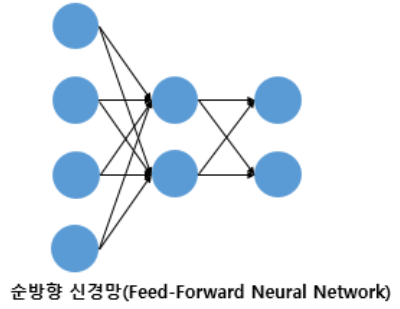

순환 신경망: 은닉층의 출력값을 출력층으로도 값을 보내지만, 동시에 은닉층의 출력값이 다시 은닉층의 입력으로 사용  
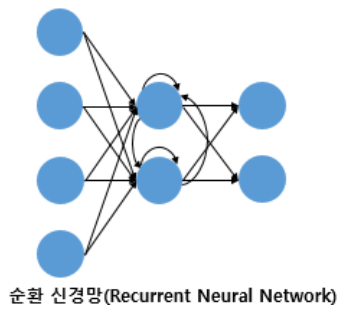

### 전결합층(Fully-connected layer, FC, Dense layer)

전결합층(Fully-connected layer)/완전연결층/밀집층(Dense layer): 어떤 층의 모든 뉴런이 이전 층의 모든 뉴런과 연결돼 있는 층  
케라스에서는 밀집층을 구현할 때 Dense()를 사용

### 활성화 함수(Activation Function)

1. 활성화 함수의 정의

활성화 함수(Activation function): 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수 (앞서 배운 퍼셉트론에서는 계단 함수(Step function)를 통해 출력값이 0이 될지, 1이 될지를 결정했습니다. 이러한 매커니즘은 실제 뇌를 구성하는 신경 세포 뉴런이 전위가 일정치 이상이 되면 시냅스가 서로 화학적으로 연결되는 모습을 모방한 것입니다.)

2. 활성화 함수의 특징

활성화 함수의 특징: 인공 신경망에서 활성화 함수는 비선형 함수(직선 1개로는 그릴 수 없는 함수)여야 합니다. (인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다. 그런데 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없습니다.)    

활성화 함수가 존재하지 않는 선형 함수 층을 사용하지 않는다는 의미는 아닙니다.  
은닉층/비선형층: 활성화 함수를 사용   
선형층/투사층: 선형 함수를 사용 ex. 임베딩 층

3. 활성화 함수의 종류

(1) 계단 함수(Step function)

계단 함수는 이제 거의 사용되지 않는다.

C:\Users\82105\AppData\Local\Temp\ipykernel_172036\2045181516.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


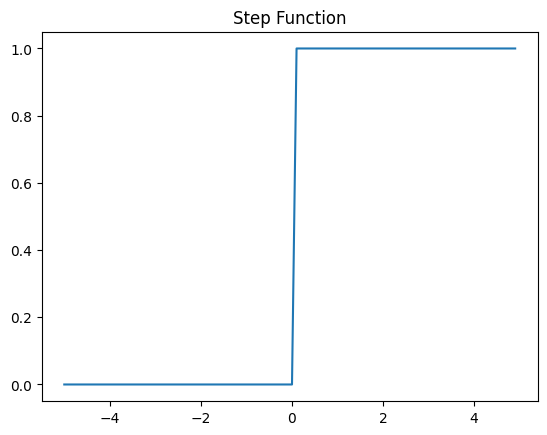

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

(2) 시그모이드 함수(Sigmoid function)와 기울기 소실

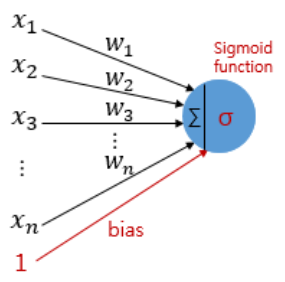  
cf. 인공 신경망의 학습 과정  
입력 -> 순전파(forward propagation) 연산을 통해 예측값 계산 -> 손실 함수(loss function)을 통해 예측값과 실제값의 오차 계산 -> 손실함수의 미분을 통해 기울기(gradient)을 계산 후 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation) 수행(경사 하강법 사용)

시그모이드 함수의 은닉층에서의 사용은 기울기 소실(Vanishing Gradient) 문제로 인해 지양됩니다. 시그모이드 함수는 주로 이진 분류를 위해 출력층에서 사용합니다.

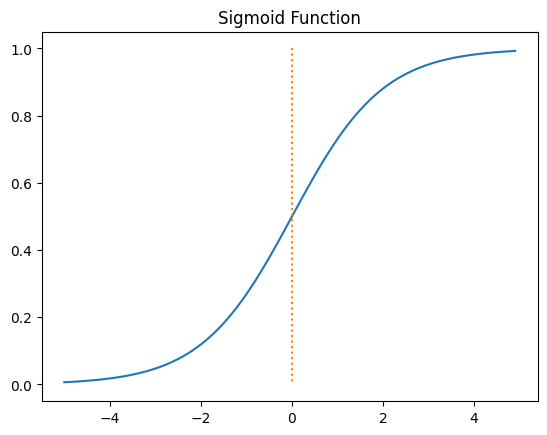

In [8]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

(3) 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수는 시그모이드 함수보다는 기울기 소실 증상이 적은 편이여서 은닉층에서 시그모이드 함수보다는 선호됩니다. 하지만 하이퍼볼릭탄젠트 함수도 -1과 1에 가까운 출력값을 출력할 때, 시그모이드 함수와 같은 문제가 발생합니다.

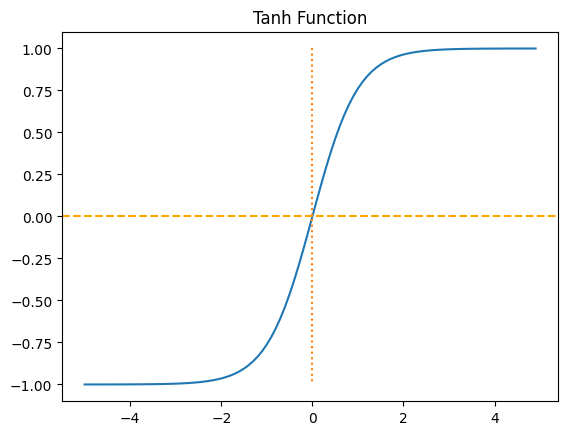

In [9]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

(4) 렐루 함수(ReLU)

인공 신경망의 은닉층에서 가장 인기있는 함수입니다. 하지만 여전히 문제점이 존재하는데, 입력값이 음수면 기울기. 즉, 미분값도 0이 됩니다. 그리고 이 뉴런은 다시 회생하는 것이 매우 어렵습니다. 이 문제를 죽은 렐루(dying ReLU)라고 합니다.

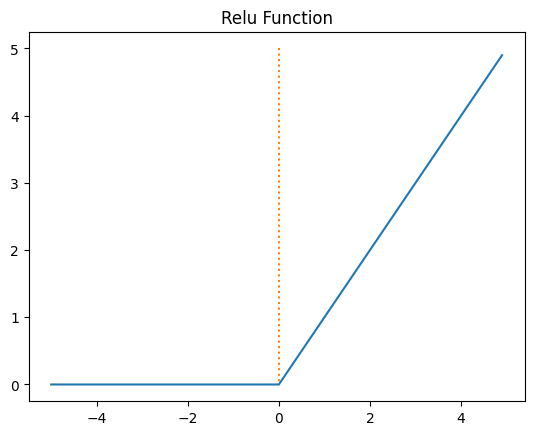

In [10]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

(5) 리키 렐루(Leaky ReLU)

죽은 렐루를 보완하기 위해 ReLU의 변형 함수들이 등장하기 시작했습니다. eaky ReLU는 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다.

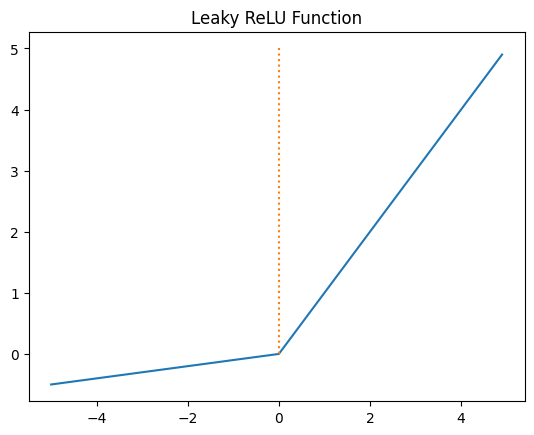

In [11]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

(6) 소프트맥스 함수(Softmax function)

은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적입니다. 반면, 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용됩니다. 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용됩니다. 다시 말해서 딥 러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 회귀를 사용하고, 딥 러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용한다고 생각할 수 있습니다.

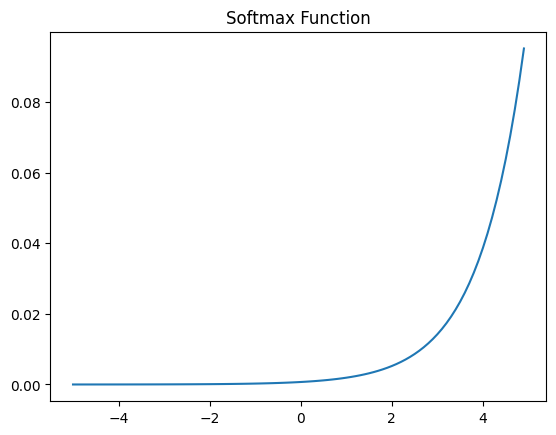

In [12]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()